## Import the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
import seaborn as sns

## Load the datasets

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


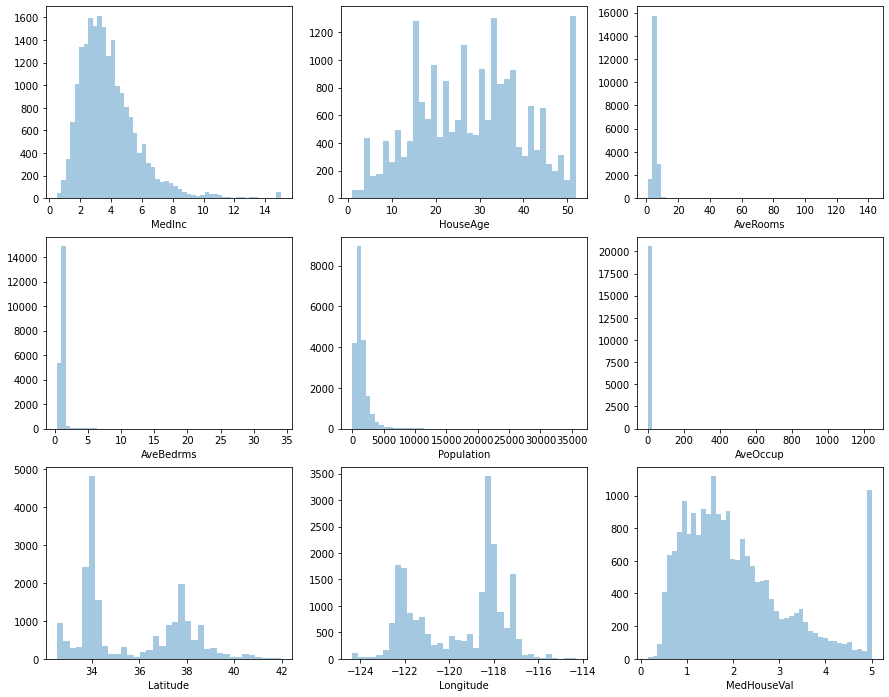

In [4]:
# Figure size
plt.figure(figsize=(15,12))
# columns
cols = df.columns

# Distribution plot
for i in range(len(cols)):
    # Subplot
    plt.subplot(3,3,i+1)
    #Distribution plot
    sns.distplot(df[cols[i]], kde = False)
    
plt.show()

Text(0, 0.5, 'Latitude')

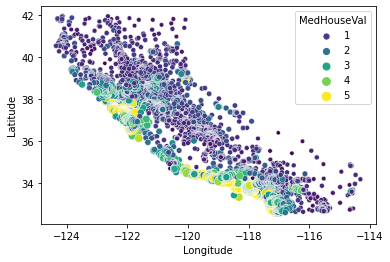

In [5]:
lat_long_plot = sns.scatterplot(y = df['Latitude'],
                                x = df['Longitude'], 
                                data = df, 
                                size = df['MedHouseVal'], 
                                hue = df['MedHouseVal'], 
                                palette = 'viridis')
lat_long_plot.set_xlabel('Longitude')
lat_long_plot.set_ylabel('Latitude')

## Split Train and Test Datasets

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df,
                                                    df['MedHouseVal'], 
                                                    test_size = 0.25, 
                                                    random_state=42)

## Define Joint Distribution Plots

In [7]:
def plot_dist(data):
    plt.figure(figsize=(8, 5))
    sns.jointplot(x =data[0:500, 0], y = data[0:500, 5], data = data)
    plt.xlabel('Median Income')
    plt.ylabel('Average Occuoancy')
    plt.show()

## Define Regression Model

In [8]:
def linear_reg(X_train, Y_train, X_test, Y_test):
    reg_model = SGDRegressor()
    reg_model.fit(X_train, Y_train)
    pred = reg_model.predict(X_test)
    accuracy = mean_squared_error(Y_test, pred)
    return accuracy

## Without Scaling

<Figure size 576x360 with 0 Axes>

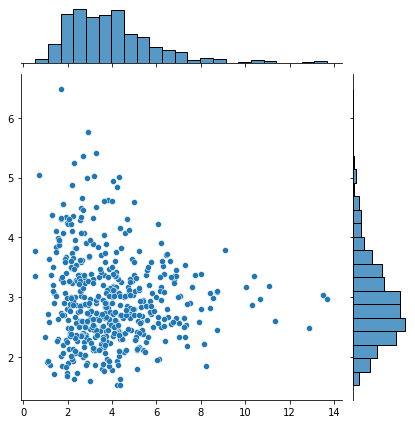

MSE  : 2.015159524556934e+29


In [9]:
# Plot the joint distribution for first 1000 datasets
plot_dist(X_train.values)

# without feature scaling 
acc = linear_reg(X_train, Y_train, X_test, Y_test)
print(f'MSE  : {acc}')

## With Scaling

<Figure size 576x360 with 0 Axes>

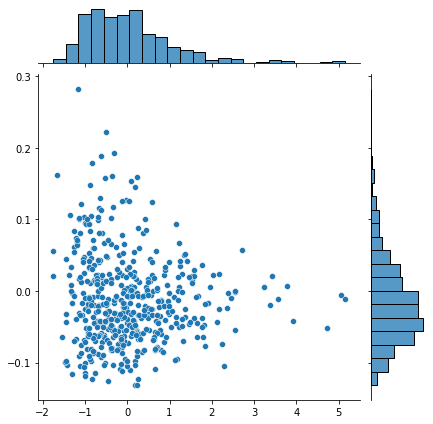

Accuracy with standard scaler : 8.36297462519846e-06


In [10]:
# performing standardization
std_scaler = StandardScaler()

X_train_std_scaler = std_scaler.fit_transform(X_train)
X_test_std_scaler  = std_scaler.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_std_scaler)

# with standard scaler
acc = linear_reg(X_train_std_scaler, Y_train, X_test_std_scaler, Y_test)
print(f'Accuracy with standard scaler : {acc}')

<Figure size 576x360 with 0 Axes>

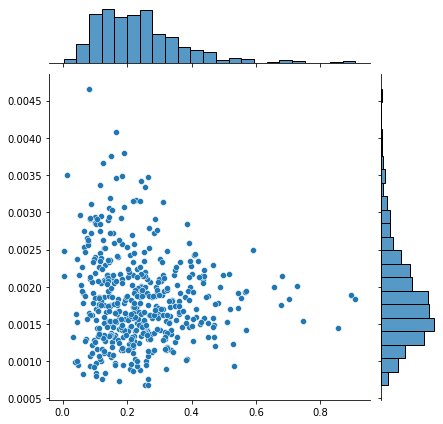

Accuracy with minmax scaler : 0.005989859492180968


In [11]:
# performing min_max_scaler
min_max_scaler = MinMaxScaler()

X_train_min_max_scaler = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaler = min_max_scaler.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_min_max_scaler)

# with minmax scaler
acc = linear_reg(X_train_min_max_scaler, Y_train, X_test_min_max_scaler, Y_test)
print(f'Accuracy with minmax scaler : {acc}')

<Figure size 576x360 with 0 Axes>

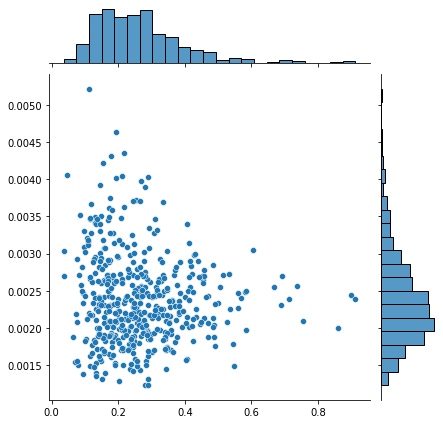

Accuracy with maxabs scaler : 0.006111125242559389


In [12]:
max_abs_scaler = MaxAbsScaler()

X_train_max_abs_scaler = max_abs_scaler.fit_transform(X_train)
X_test_max_abs_scaler = max_abs_scaler.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_max_abs_scaler)

# with maxabs scaler
acc = linear_reg(X_train_max_abs_scaler, Y_train, X_test_max_abs_scaler, Y_test)
print(f'Accuracy with maxabs scaler : {acc}')

<Figure size 576x360 with 0 Axes>

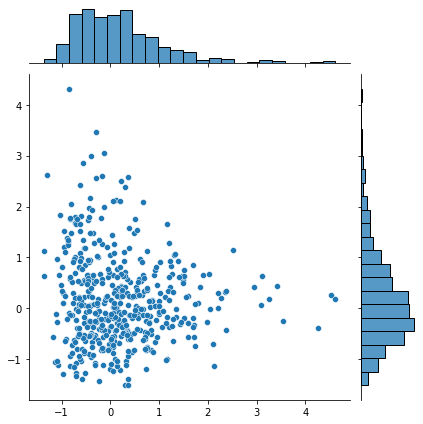

Accuracy with robust scaler : 1.4857182807328675e+22


In [13]:
robust_scaler = RobustScaler()

X_train_robust_scaler = robust_scaler.fit_transform(X_train)
X_test_robust_scaler = robust_scaler.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_robust_scaler)

# with robust scaler
acc = linear_reg(X_train_robust_scaler, Y_train, X_test_robust_scaler, Y_test)
print(f'Accuracy with robust scaler : {acc}')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


<Figure size 576x360 with 0 Axes>

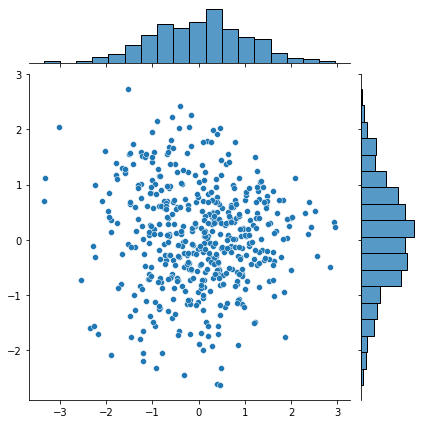

Accuracy with power transform    : 0.0925961542008338


In [14]:
power_transform = PowerTransformer()

X_train_power_transform = power_transform.fit_transform(X_train)
X_test_power_transform = power_transform.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_power_transform)

# with power transform
acc = linear_reg(X_train_power_transform, Y_train, X_test_power_transform, Y_test)
print(f'Accuracy with power transform    : {acc}')

<Figure size 576x360 with 0 Axes>

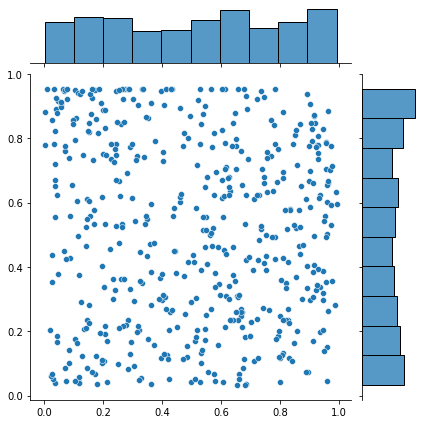

Accuracy with QuantileTransformer: 0.1270441205915465


In [15]:
quantiles = QuantileTransformer(n_quantiles=23, random_state=0)

X_train_quantiles = quantiles.fit_transform(X_train)
X_test_quantiles = quantiles.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_quantiles)

# with QuantileTransformer
acc = linear_reg(X_train_quantiles, Y_train, X_test_quantiles, Y_test)
print(f'Accuracy with QuantileTransformer: {acc}')

<Figure size 576x360 with 0 Axes>

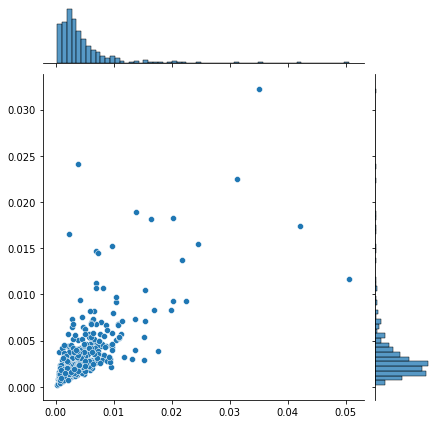

Accuracy with Normalizer : 1.320850854964033


In [16]:
normalize = Normalizer()

X_train_normalize = normalize.fit_transform(X_train)
X_test_normalize = normalize.transform(X_test)

# Plot the joint distribution
plot_dist(X_train_normalize)

# with Normalizer
acc = linear_reg(X_train_normalize, Y_train, X_test_normalize, Y_test)
print(f'Accuracy with Normalizer : {acc}')